In [8]:
import numpy as np
import torch_geometric as pyg
import HGScore.model as md
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
model_path = "../models/model.ckpt"
model = md.Model.load_from_checkpoint(model_path)

In [10]:
def get_df_abs_mean_weight(layer_name: str, nb_fts_init, nb_fts_after_lin):
    layer_weights = model.model.gcn_atm.conv_list[0].state_dict()[layer_name]
    w_sum = nb_fts_init*[0]
    for i in range(nb_fts_after_lin):
        for j in range(nb_fts_init):
            w_sum[j] += layer_weights[i][j].item()

    mean_weights = np.abs(np.array(w_sum)/nb_fts_after_lin)
    fts = ['Atom Type: B', 'Atom Type: C', 'Atom Type: N', 'Atom Type: O',
       'Atom Type: F', 'Atom Type: P', 'Atom Type: S', 'Atom Type: Other',
       'Hyb: Other', 'Hyb: sp', 'Hyb: sp2', 'Hyb: sp3',
       'Hyb: sq', 'Hyb: trig', 'Hyb: Oct', 'Partial Charge',
       'Hydrophobic', 'Aromatic Cycle', 'HBond acceptor', 'HBond donnor',
       'HBond donnor H', '- charge', '+ charge']
    df = pd.DataFrame(data=[fts, mean_weights]).transpose()
    df = df.rename(columns={0: "Feature", 1: "Absolute Mean Weight"})
    return df

[Text(0.5, 1.0, 'Protein -> Protein Node feature importance (based on the first layer)')]

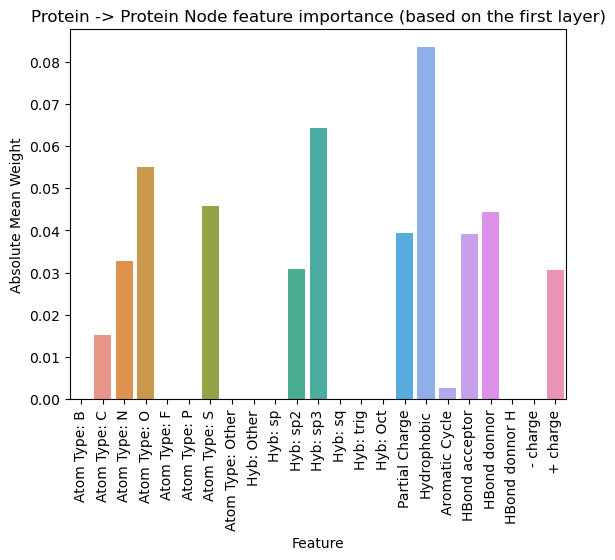

In [11]:
df_ptop = get_df_abs_mean_weight('convs.protein_atoms__linked_to__protein_atoms.lin1.weight', 23, 48)
ax = sns.barplot(data=df_ptop, x="Feature", y="Absolute Mean Weight")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Protein -> Protein Node feature importance (based on the first layer)')

[Text(0.5, 1.0, 'Ligand -> Ligand Node feature importance (based on the first layer)')]

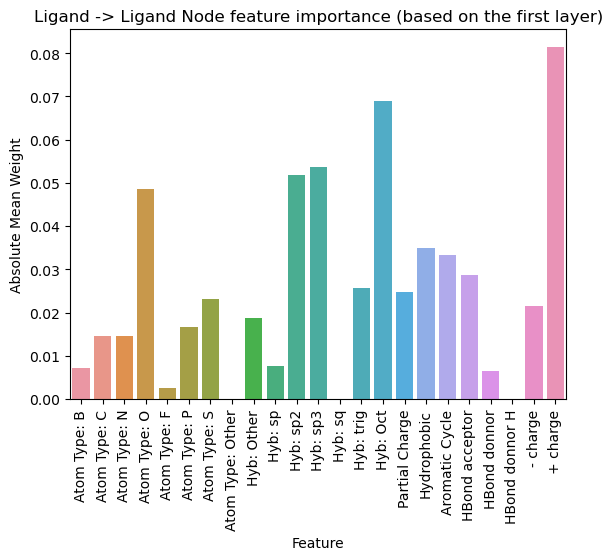

In [12]:
df_ltol = get_df_abs_mean_weight('convs.ligand_atoms__linked_to__ligand_atoms.lin1.weight', 23, 48)
ax = sns.barplot(data=df_ltol, x="Feature", y="Absolute Mean Weight")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Ligand -> Ligand Node feature importance (based on the first layer)')

[Text(0.5, 1.0, 'Ligand -> Protein Node feature importance (based on the first layer)')]

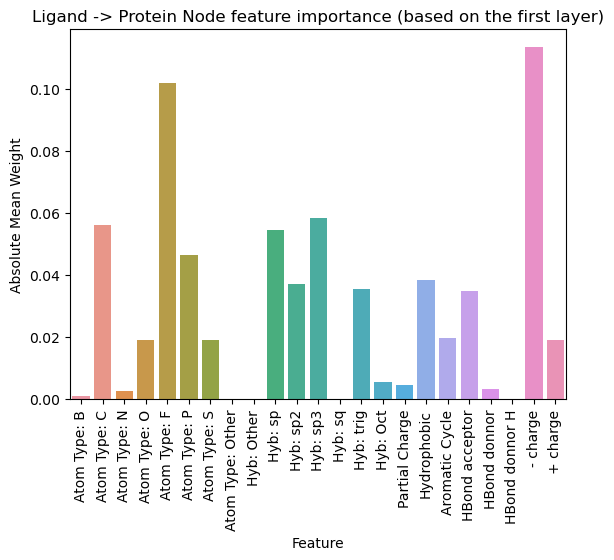

In [13]:
df_ltop = get_df_abs_mean_weight('convs.ligand_atoms__interact_with__protein_atoms.lin1_src.weight', 23, 48)
ax = sns.barplot(data=df_ltop, x="Feature", y="Absolute Mean Weight")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Ligand -> Protein Node feature importance (based on the first layer)')

[Text(0.5, 1.0, 'Protein -> Ligand Node feature importance (based on the first layer)')]

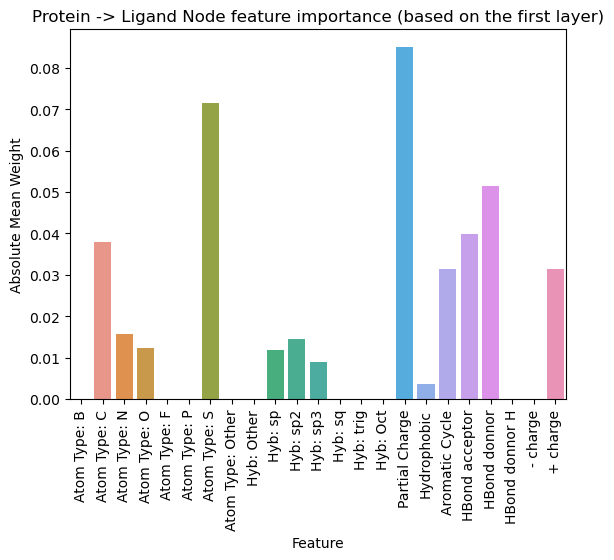

In [14]:
df_ptol = get_df_abs_mean_weight('convs.protein_atoms__interact_with__ligand_atoms.lin1_src.weight', 23, 48)
ax = sns.barplot(data=df_ptol, x="Feature", y="Absolute Mean Weight")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Protein -> Ligand Node feature importance (based on the first layer)')